In [1]:
import time
import sklearn.preprocessing, sklearn.feature_selection, sklearn.model_selection, sklearn.tree, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn.neighbors, sklearn.svm, sklearn.naive_bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import git 
import xgboost as xgb

C:\Users\PC\AppData\Local\Temp\ipykernel_12376\2300833786.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
repo = git.Repo('.', search_parent_directories=True)

train = pd.read_csv(repo.working_tree_dir + '/dataset/UNSW_NB15_training-set.csv')
test = pd.read_csv(repo.working_tree_dir + '/dataset/UNSW_NB15_testing-set.csv')

In [3]:
print("Jumlah data training : ", len(train))
print("Jumlah data training : ", len(test))

Jumlah data training :  175341
Jumlah data training :  82332


In [4]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
# Digabung dan nanti akan dipisah dengan split train test untuk hasil yang lebih maksimal
data = pd.concat([train, test]).reset_index(drop=True)

DATA PREPROCESSING

In [7]:
data.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
data.duplicated().sum()

0

In [9]:
# Check categorical data and change "-" value to "None"
cols_cat = data.select_dtypes('object').columns
for col in cols_cat:
    print(data[col].unique())
    data[col] = np.where(data[col] == '-', 'None', data[col])
    print(data[col].unique())

['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2'
 'rdp' 'irtp

In [10]:
data = data.drop(columns=['id', 'attack_cat']) # remove uncorrelated feature
cols_cat = cols_cat.drop('attack_cat')
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,tcp,None,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,tcp,None,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,tcp,None,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,tcp,None,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


In [11]:
label = data['label'].value_counts()
label

label
1    164673
0     93000
Name: count, dtype: int64

ONE HOT ENCODING

In [12]:
cat_data = data[cols_cat]

encoder = sklearn.preprocessing.OneHotEncoder()

encoded_data = encoder.fit_transform(cat_data)

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(cols_cat))

data = pd.concat([data.drop(cols_cat, axis=1), encoded_df], axis=1)

data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalization

In [13]:
cols_numeric = data._get_numeric_data().columns
cols_numeric = list(cols_numeric)

scaler = sklearn.preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(data[cols_numeric])

scaled_data = pd.DataFrame(scaled, columns=cols_numeric)
normalized_data = pd.concat([data.drop(cols_numeric, axis=1), scaled_data, ], axis=1)

data = normalized_data

data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.002025,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010832,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027052,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.028027,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.007491,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x = data.drop('label', axis=1)
y = data['label']

kbest = sklearn.feature_selection.SelectKBest(score_func=sklearn.feature_selection.chi2, k=34)
kbest.fit(x, y)

X_kbest = kbest.transform(x)

kbest_indices = kbest.get_support(indices=True)

print(kbest_indices)

selected_features = x.columns[kbest_indices]
selected_data = data[selected_features]

data = pd.concat([selected_data, y], axis=1)

data.head()

[  5   6   8   9  12  16  17  18  19  24  27  28  29  30  31  32  36  37
  38  45 117 136 152 158 159 172 174 176 179 183 187 189 190 192]


,rate,sttl,sload,dload,sinpkt,swin,stcpb,dtcpb,dwin,dmean,...,service_None,service_dns,service_ftp-data,service_pop3,service_ssh,state_CON,state_FIN,state_INT,state_REQ,label
0,0.000074,0.988235,2.364553e-06,0.000379,0.000288,1.0,0.144768,0.512828,1.0,0.028667,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000078,0.243137,1.401989e-06,0.022458,0.000592,1.0,0.330128,0.716524,1.0,0.737333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000014,0.243137,2.625704e-07,0.002717,0.002748,1.0,0.492706,0.689918,1.0,0.549333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000014,0.243137,4.576117e-07,0.000150,0.001812,1.0,0.257772,0.243882,1.0,0.042667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000033,0.996078,1.429776e-06,0.000178,0.000566,1.0,0.567209,0.460351,1.0,0.030000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Model Training

In [15]:
x = data.drop(columns=['label'])
x = np.array(x)
y = data['label']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.3)
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 180371
Testing set: 77302


In [19]:
models = {}

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
dt = sklearn.tree.DecisionTreeClassifier()
lr = sklearn.linear_model.LogisticRegression()

models['Bagged KNN'] = sklearn.ensemble.BaggingClassifier(knn, n_estimators=10) # Bagging
models['Random Forest'] = sklearn.ensemble.RandomForestClassifier() # Bagging
models['AdaBoost'] = sklearn.ensemble.AdaBoostClassifier() # Boosting
models['XGBoost'] = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc") # Boosting

estimators = [
    ('knn', knn),
    ('dt', dt),
    ('nb', lr)
]

estimators_2 = [
    ('bknn', models['Bagged KNN']),
    ('rf', models['Random Forest']),
    ('ab', models['AdaBoost']),
    ('xgb', models['XGBoost'])
]

models['Stacking'] = sklearn.ensemble.StackingClassifier(estimators=estimators, final_estimator=sklearn.linear_model.LogisticRegression()) # Stacking
models['Multi Ensemble'] = sklearn.ensemble.StackingClassifier(estimators=estimators_2, final_estimator=sklearn.linear_model.LogisticRegression()) # Stacking


train_score, accuracy, precision, recall, training_time, y_pred, f1 = {}, {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(x_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(x_test)
    
    train_score[key] = models[key].score(x_train, y_train)
    accuracy[key] = models[key].score(x_test, y_test)
    precision[key] = sklearn.metrics.precision_score(y_test, y_pred[key])
    recall[key] = sklearn.metrics.recall_score(y_test, y_pred[key])
    f1[key] = sklearn.metrics.f1_score(y_test,y_pred[key], average='binary', pos_label=1)
    print(key, "done")

In [20]:
res = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time', 'F1 Score'])
res['Training score'] = train_score.values()
res['Accuracy'] = accuracy.values()
res['Precision'] = precision.values()
res['Recall'] = recall.values()
res['Training time'] = training_time.values()
res['F1 Score'] = f1.values()
res

,Training score,Accuracy,Precision,Recall,Training time,F1 Score
Bagged KNN,0.946516,0.918411,0.935010,0.937340,0.432024,0.936174
Random Forest,0.997095,0.943818,0.956152,0.955822,23.415639,0.955987
AdaBoost,0.922504,0.923598,0.933083,0.948324,15.198659,0.940642
XGBoost,0.947286,0.939678,0.958616,0.946358,8.180172,0.952448
Stacking,0.976149,0.927906,0.933576,0.955012,49.407267,0.944172
Multi Ensemble,0.987648,0.943831,0.955598,0.956450,572.711812,0.956024


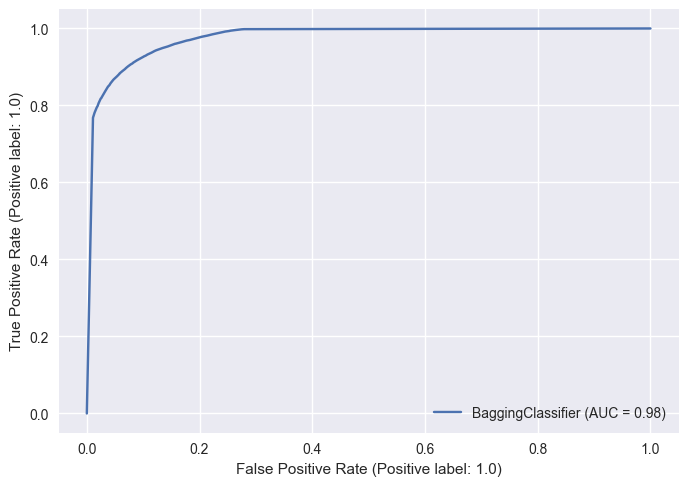

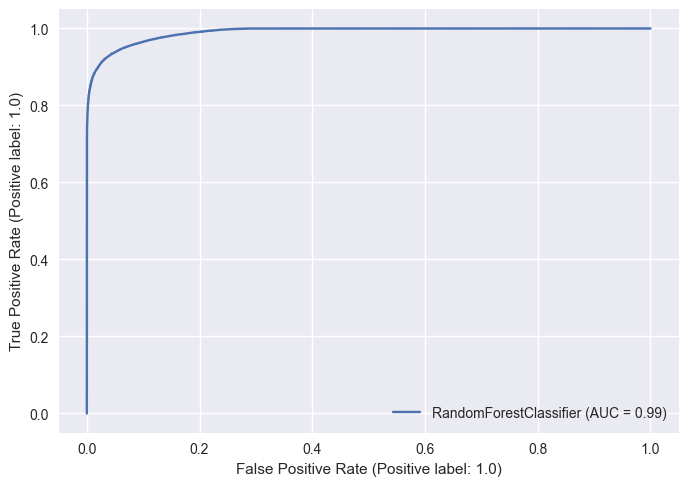

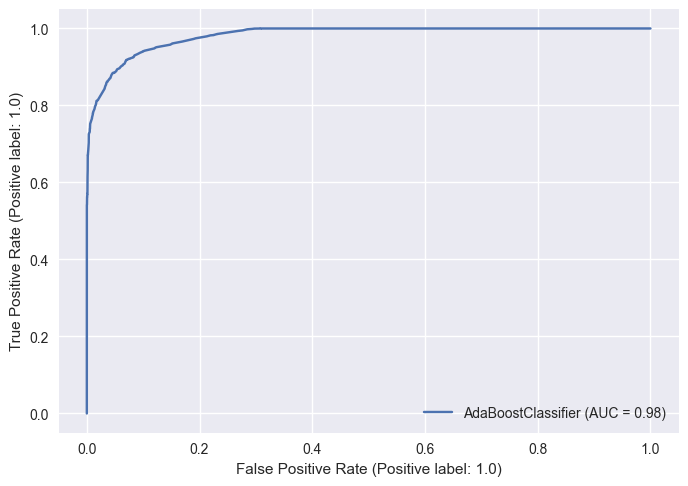

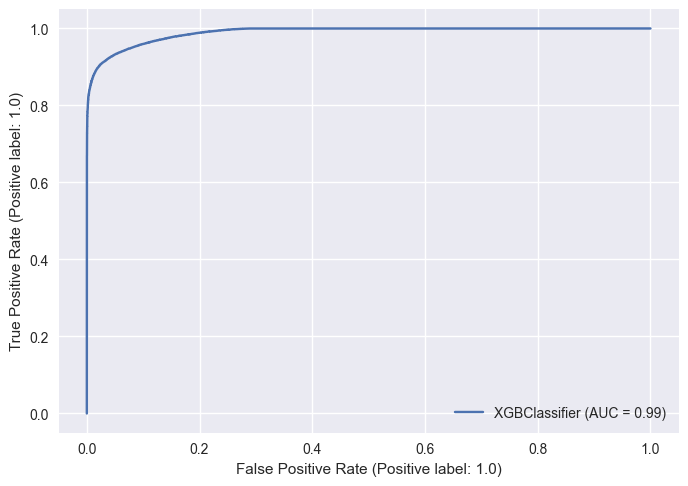

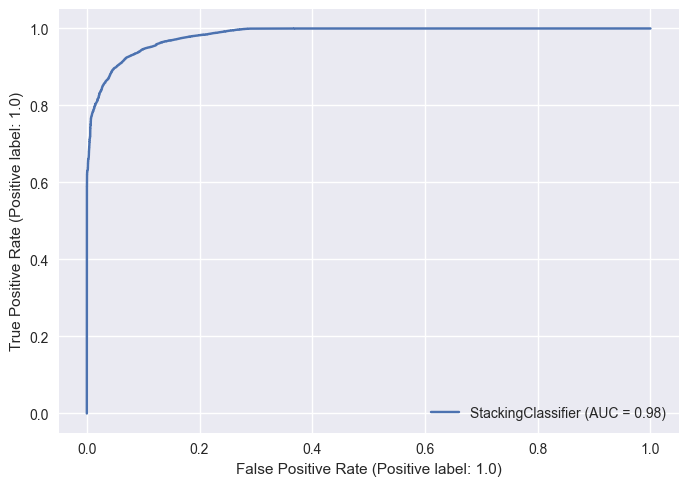

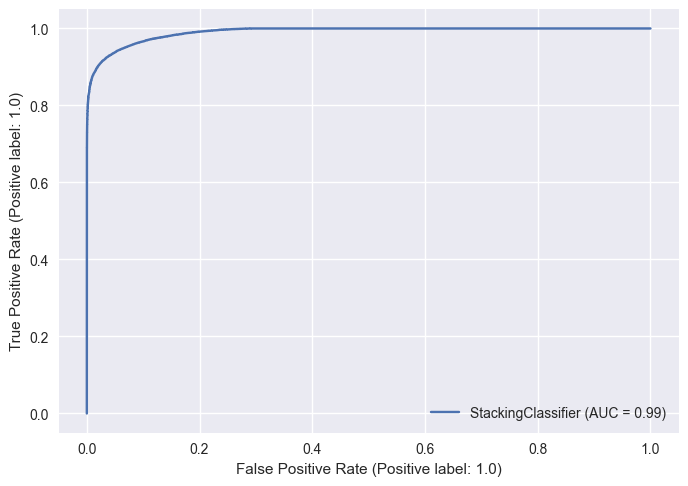

In [21]:
# ROC AUC CURVE
for key in models.keys():
    display = sklearn.metrics.RocCurveDisplay.from_estimator(models[key], x_test, y_test)

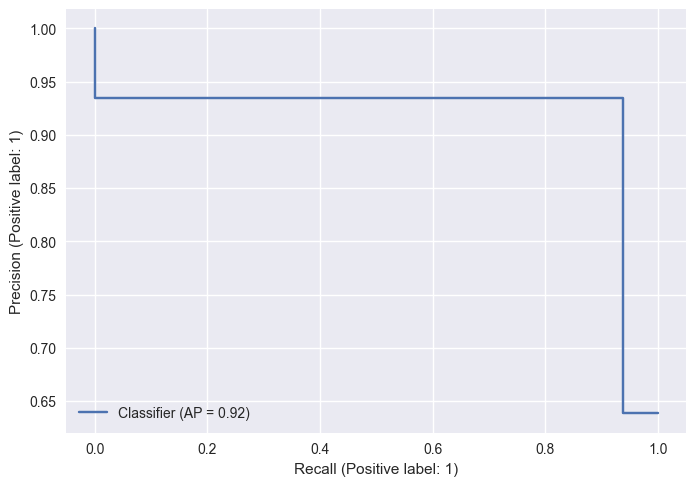

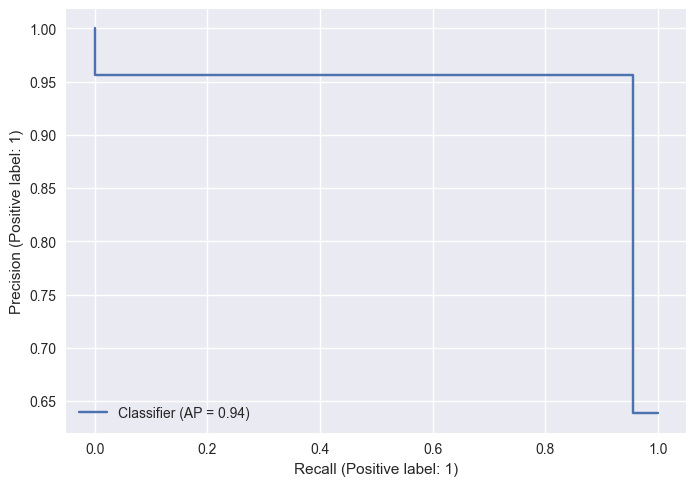

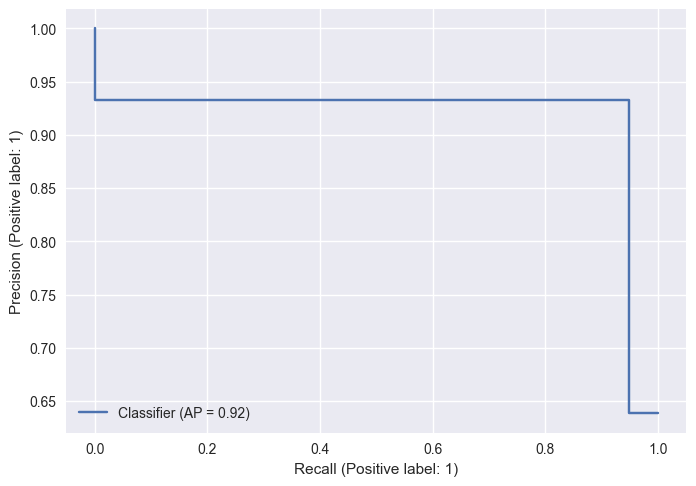

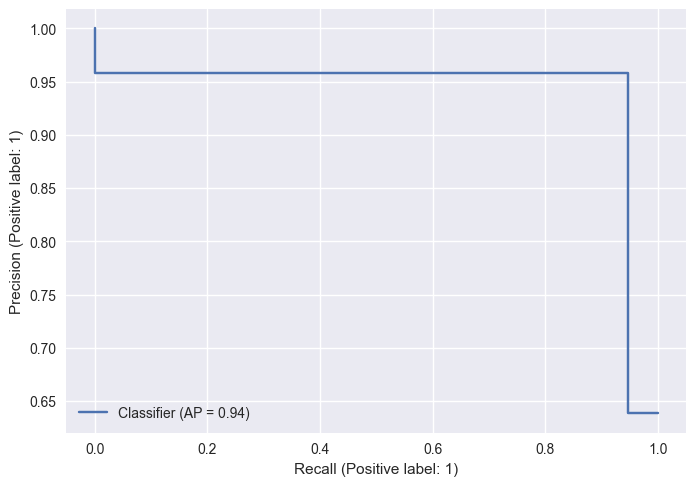

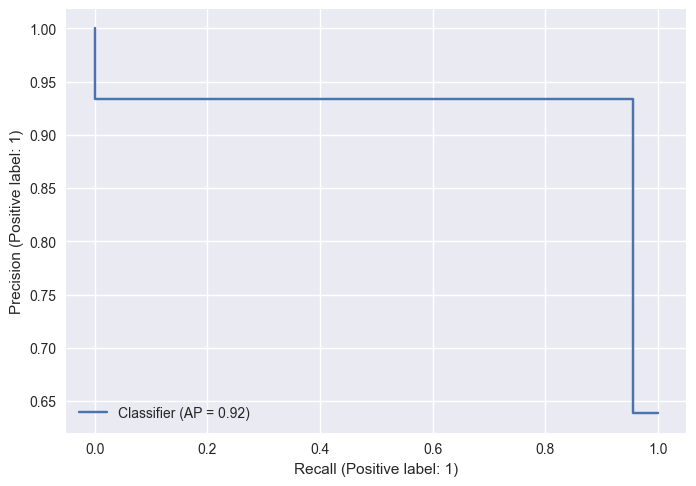

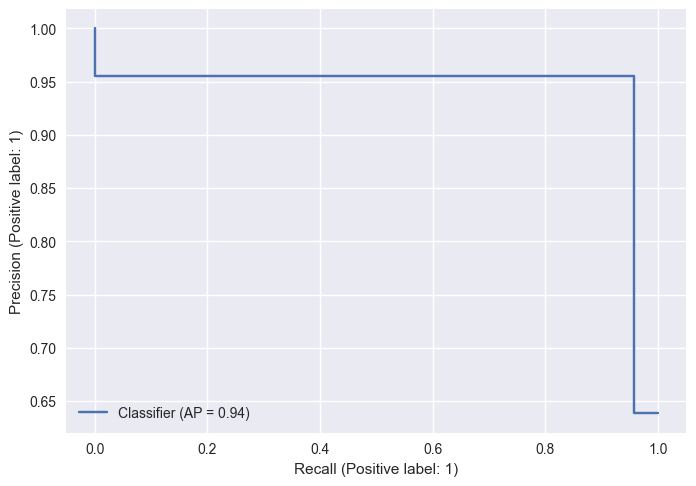

In [22]:
# PRECISION RECALL
for key in models.keys():
    display = sklearn.metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred[key])

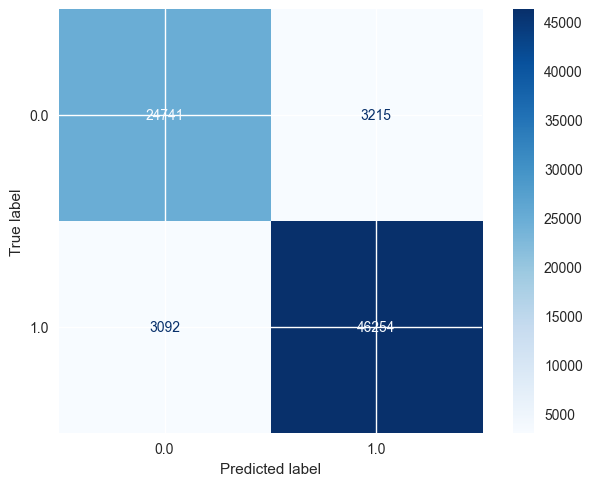

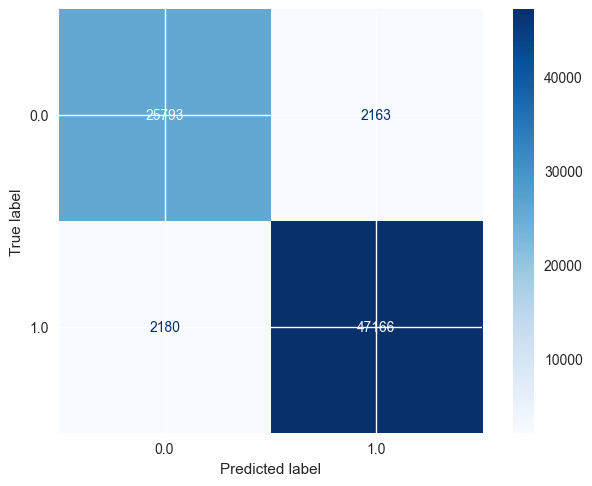

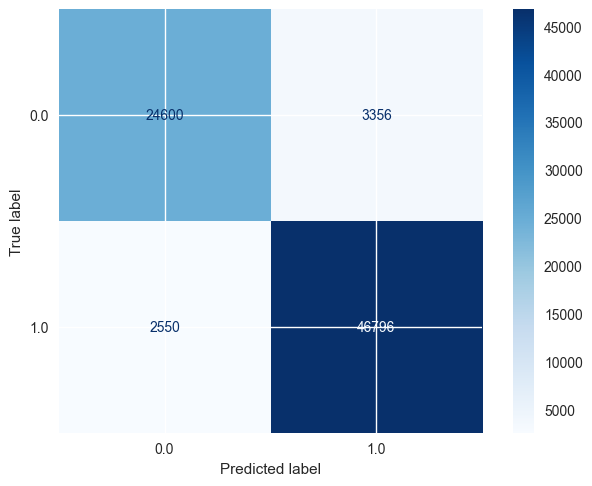

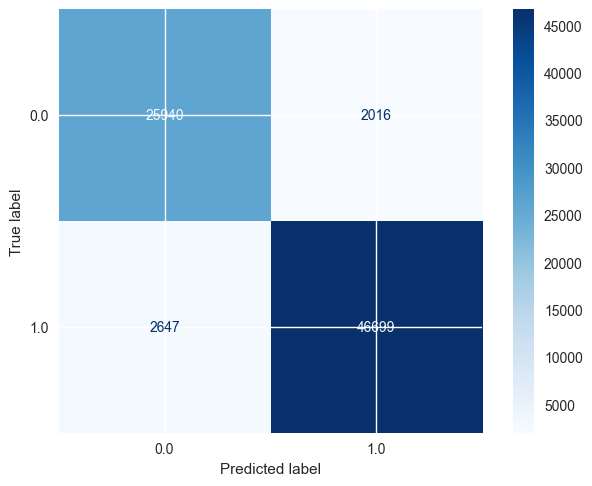

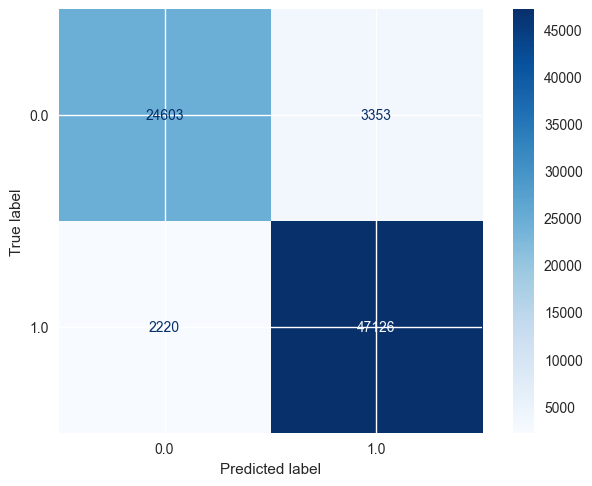

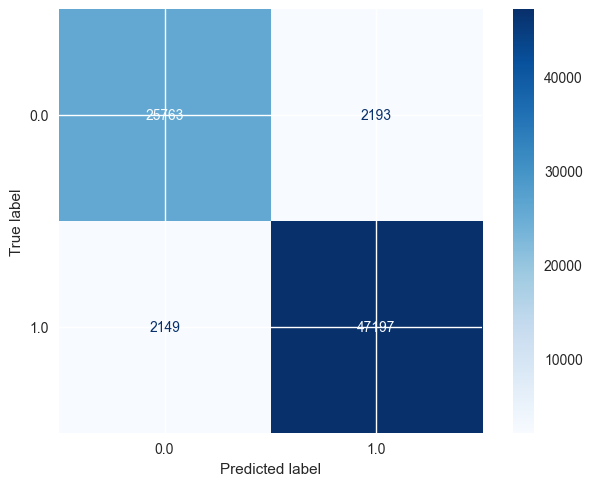

In [23]:
for key in models.keys():
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred[key])
    display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[key].classes_)
    display.plot(cmap='Blues')